In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpig

## Read and show the image

(540, 960, 3)

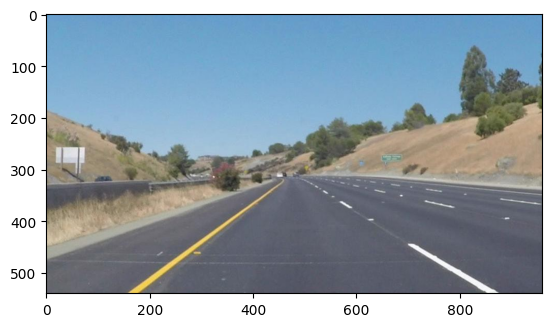

In [3]:
image = mpig.imread("Images/lane.jpeg")
plt.imshow(image)
image.shape

## Convert to Grayscale

(540, 960)

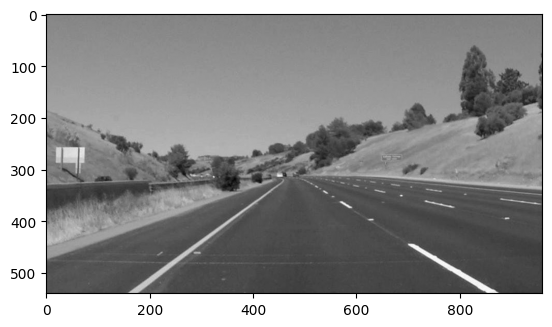

In [7]:
image_g = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image_g, cmap='gray')
image_g.shape

## Gaussian Blurring and Canny Edge Detection

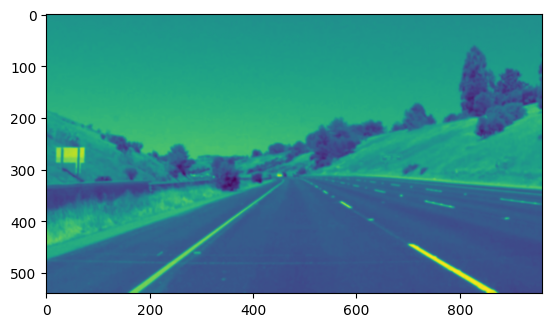

In [8]:
image_b = cv2.GaussianBlur(image_g, (7,7), 0)
plt.imshow(image_b)

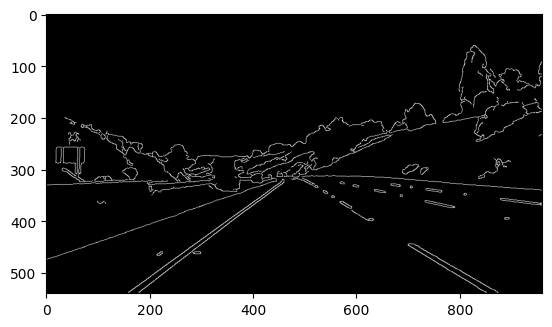

In [34]:
threshold_low = 10
threshold_high = 100

image_canny = cv2.Canny(image_b, threshold_low, threshold_high)
plt.imshow(image_canny, cmap = 'gray')

## Define Region of Interest

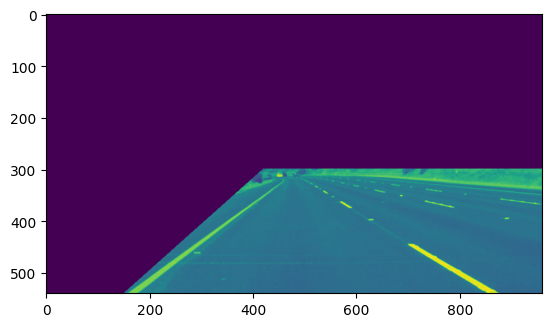

In [40]:
#Visualizing the region of interest
vertices = np.array([[(150, 540),(420,300),(960,300),(960,540)]], dtype=np.int32)
mask = np.zeros_like(image_g)
cv2.fillPoly(mask, vertices, 255)
masked_image = cv2.bitwise_and(image_g, mask)
plt.figure()
plt.imshow(masked_image)

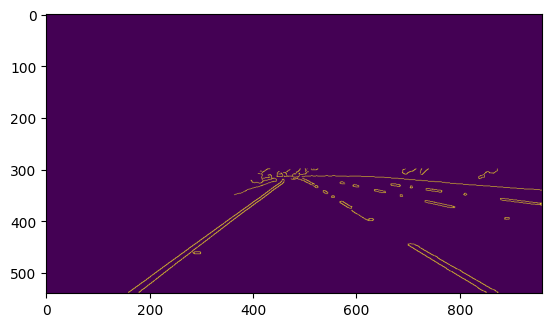

In [41]:
masked_image = cv2.bitwise_and(image_canny, mask)
plt.figure()
plt.imshow(masked_image)

## Hough Lines Detection and Draw Function

In [42]:
rho = 2 # Distance resolution  in pixels
theta = np.pi/180 # Angular Resolution in Radians
threshold = 100 # Minimum number of votes
min_line_len = 100 # Minimum number of pixels making up a line
max_line_gap = 50 # Maximum gap in pixels between connectable line segments
lines = cv2.HoughLinesP(
    masked_image, rho, theta, threshold, np.array([]),
    minLineLength=min_line_len, maxLineGap=max_line_gap)

# Creating an emplty black image
line_image = np.zeros((masked_image.shape[0], masked_image.shape[1], 3), dtype=np.uint8)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image, (x1,y1), (x2,y2), [255,0,0],10)
lines

array([[[160, 538, 469, 314]],

       [[219, 507, 491, 302]],

       [[711, 445, 873, 539]],

       [[652, 316, 925, 339]],

       [[700, 447, 852, 538]],

       [[179, 538, 282, 460]],

       [[418, 311, 635, 315]],

       [[428, 300, 547, 314]],

       [[667, 330, 813, 348]],

       [[489, 310, 621, 399]],

       [[673, 333, 814, 350]],

       [[470, 303, 634, 397]],

       [[570, 326, 791, 373]]], dtype=int32)

In [43]:
alpha = 1
beta = 1
gamma = 0

Image_with_lines = cv2.addWeighted(image, alpha, line_image, beta, gamma)

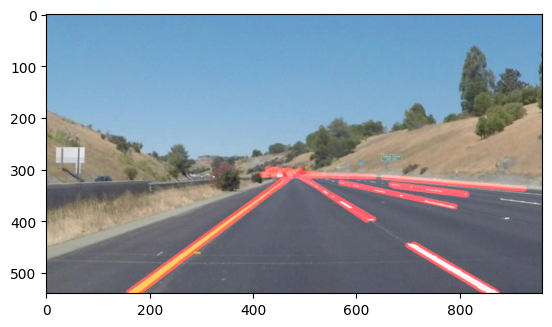

In [44]:
plt.figure()
plt.imshow(Image_with_lines)